# Introducrtion to Machine Learning: Assignment #1
## Submission date: 31\1\2024, 23:59.
### Topics:
- Linear regression
- Gaussian Bayes
- Naïve bayes
- KNN

Submitted by:

Or Dinar 207035809

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


## Question 1 - Linear regression

You will implement simple linear regression alone! <br/> The dataset consists of few 1-feature samples $\{(x_i,y_i )\}_{i=1}^∞$ where $y_i$ is the prediction of the $x_i$ sample. <br/>
We will only try to fit the given data, <u>without validation or test</u>.<br/>
We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.


import libarires

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>Assume the data is already zero-centered

In [3]:
def Linreg_sol(X, y):
    product = X.T @ X
    productInv = np.linalg.inv(product)
    
    w = productInv @ X.T @ y
    return w[0][0]

first visualization

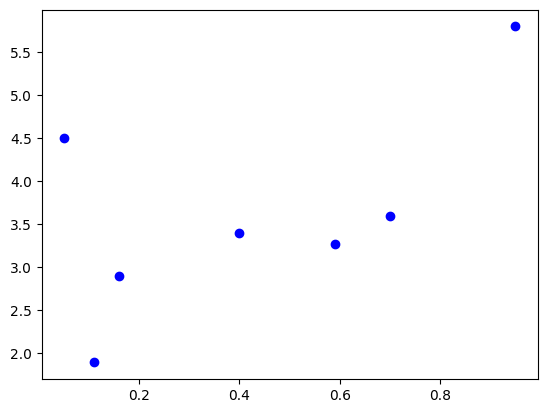

In [5]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

Split the data to X,y.<br/>
Since the data is non-zero centered, center it to mean zero (since we discussed only y=wx). Then, run the solution.

In [6]:
# X is an array of all Xi
# y is an array of all yi
# both are from dimensions nxd, where d=1
X = (data[:,0]).reshape((len(data[:,0]), 1))    # reshape the array to nx1
y = (data[:,1]).reshape((len(data[:,1]), 1))    # reshape the array to nx1

#calculate mean array, mean[0]= mean of X, mean[1] = mean of y
mean = np.array([np.mean(X),np.mean(y)])

#center data
X = X - mean[0]
y = y - mean[1]

w = Linreg_sol(X, y)

# Restore the original line. if y'=wx' (after removing bias) than y-u_y = w(x-u_x), isolate y.
print(f'The linear line is y={w:.2f}*(x-{mean[0]:.2f})+{mean[1]:.2f}')

The linear line is y=2.17*(x-0.42)+3.62


Plot the line solution <br/>
Does the line really fits the data? <br/>
<font color='aqua'>The line does not fit the data precisely but you could see a trend in the linear regression solution to try and approximate the output given an input</font>

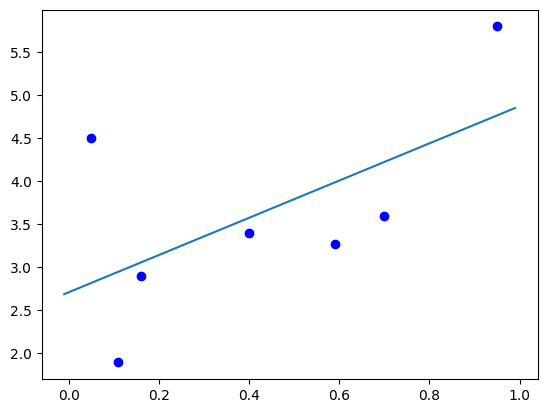

In [7]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

As we learned, try scaling using standardization, repeat the above process.<br/>DON'T use sklearn

In [12]:
# Calculate mean array, mean[0]= mean of X, mean[1] = mean of y
mean = np.array([np.mean(data[:,0]),np.mean(data[:,1])])
# Calculate standrad deviation array, std[0] = std of X, std[1] = std of y
std = np.array([np.std(data[:,0]),np.std(data[:,1])])

# Implement the standardization scaling on the data
newData = (data - mean) / std

newMean = np.array([np.mean(newData[:,0]),np.mean(newData[:,1])])
newStd = np.array([np.std(newData[:,0]),np.std(newData[:,1])])

newX = (newData[:,0]).reshape((len(newData[:,0]), 1))
newy = (newData[:,1]).reshape((len(newData[:,1]), 1))
w = Linreg_sol(newX, newy)

# Restore the original line. if y'=wx' (after standardization) than (y-u_y)/std_y = w(x-u_x)/std_x, isolate y.
print(f'The linear line is y=({w:.2f}*((x-{newMean[0]:.2f})/{newStd[0]:.2f})*{newStd[1]:.2f}+{newMean[1]:.2f})')

The linear line is y=(0.59*((x-0.00)/1.00)*1.00+0.00)


Plot the line solution <br/>
Is the result better? <br/>
Hint: compare both lines obtained. Why do you think this happened? <br/>
<font color='aqua'>We scaled the entire data, it's no surprise that the prediction line for them would look the same <b>in relation</b> to the points.</font>


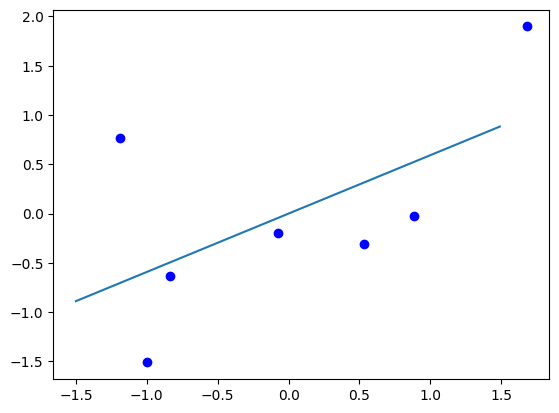

In [19]:
x = np.arange(-1.5, 1.5, 0.01)          # I changed this line of code for better visualization
y = w * (x - newMean[0]) * newStd[1] / newStd[0] + newMean[1]
plt.plot(x,y)

plt.scatter(newData[:,0], newData[:,1], color='blue', label='Data')
plt.show()

We Say that a point as outlier if it is located further than one standard deviation above or below the best-fit line. <br/>
Find and print the outliers from the (original) dataset


In [49]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])

X = (data[:,0]).reshape((len(data[:,0]), 1))    # reshape the array to nx1
y = (data[:,1]).reshape((len(data[:,1]), 1))    # reshape the array to nx1
w = Linreg_sol(X,y)                             # calculate w

#calculate mean array, mean[0]= mean of X, mean[1] = mean of y
mean = np.array([np.mean(X),np.mean(y)])

# Calculate standrad deviation array, std[0] = std of X, std[1] = std of y
std = np.array([np.std(data[:,0]),np.std(data[:,1])])

b0 = mean[1] - w * mean[0]      # calculating intecept for zero centered data

# array of all predicted y's the linear regression will output - later we will
# compare those values with the data's values
predictedY = X * w + b0

toRemoveIndices = []

for i in range(len(data)):
    if(np.abs(y[i] - predictedY[i]) > std[1]):          # comparing the subtraction to ONE std of y axis
        print(f'outlier point: {data[i]} ,predicted Y: {predictedY[i][0]:.2f}')
        toRemoveIndices.append(i)

outlier point: [0.7 3.6] ,predicted Y: 5.37
outlier point: [0.59 3.27] ,predicted Y: 4.67
outlier point: [0.05 4.5 ] ,predicted Y: 1.28


Run the linear regression again, but remove the outliers <br/>
Is the result better? <br/>
<font color='aqua'>I'm assuming after removing outlier points the line should look better correlated to the data, but since we had 7 samples and removed 3 it is not noticable</font>

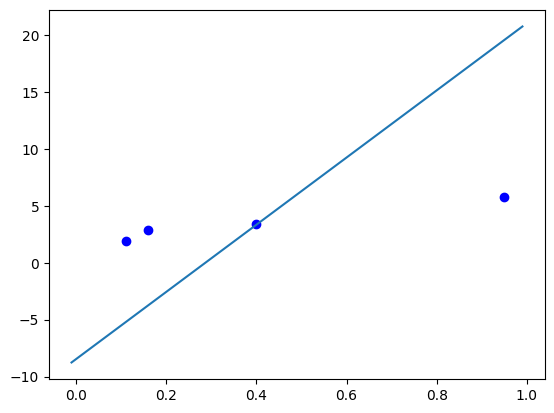

In [50]:
# Removal of outlier points
for i in range(len(toRemoveIndices)):
    data = np.delete(data, toRemoveIndices[len(toRemoveIndices)-i-1], axis = 0)     # removing outlier points by their index
                                                                                    # starting from the end because 
                                                                                    # I'm changing the array while iterating over it
X = (data[:,0]).reshape((len(data[:,0]), 1))
y = (data[:,1]).reshape((len(data[:,1]), 1))

w = Linreg_sol(X,y)

#calculate mean array, mean[0]= mean of X, mean[1] = mean of y
mean = np.array([np.mean(X),np.mean(y)])

# Calculate standrad deviation array, std[0] = std of X, std[1] = std of y
std = np.array([np.std(data[:,0]),np.std(data[:,1])])


x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

## Question 2 - Gaussian bayes


You are given data of wine bottles and want to learn the type of wine which it belongs to. The dataset consists of 13 continuous features and 3 classes of wine. <br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.

import libarires

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv

In [37]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv')

print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features, using plotting for data frames. <br/>
Will gaussian bayes work here or not? <br/>
<font color='aqua'>there is potential for gaussian bayes since all features distribute like normal distribution more or less, and this is exactly what gaussian bayes assumes</font>

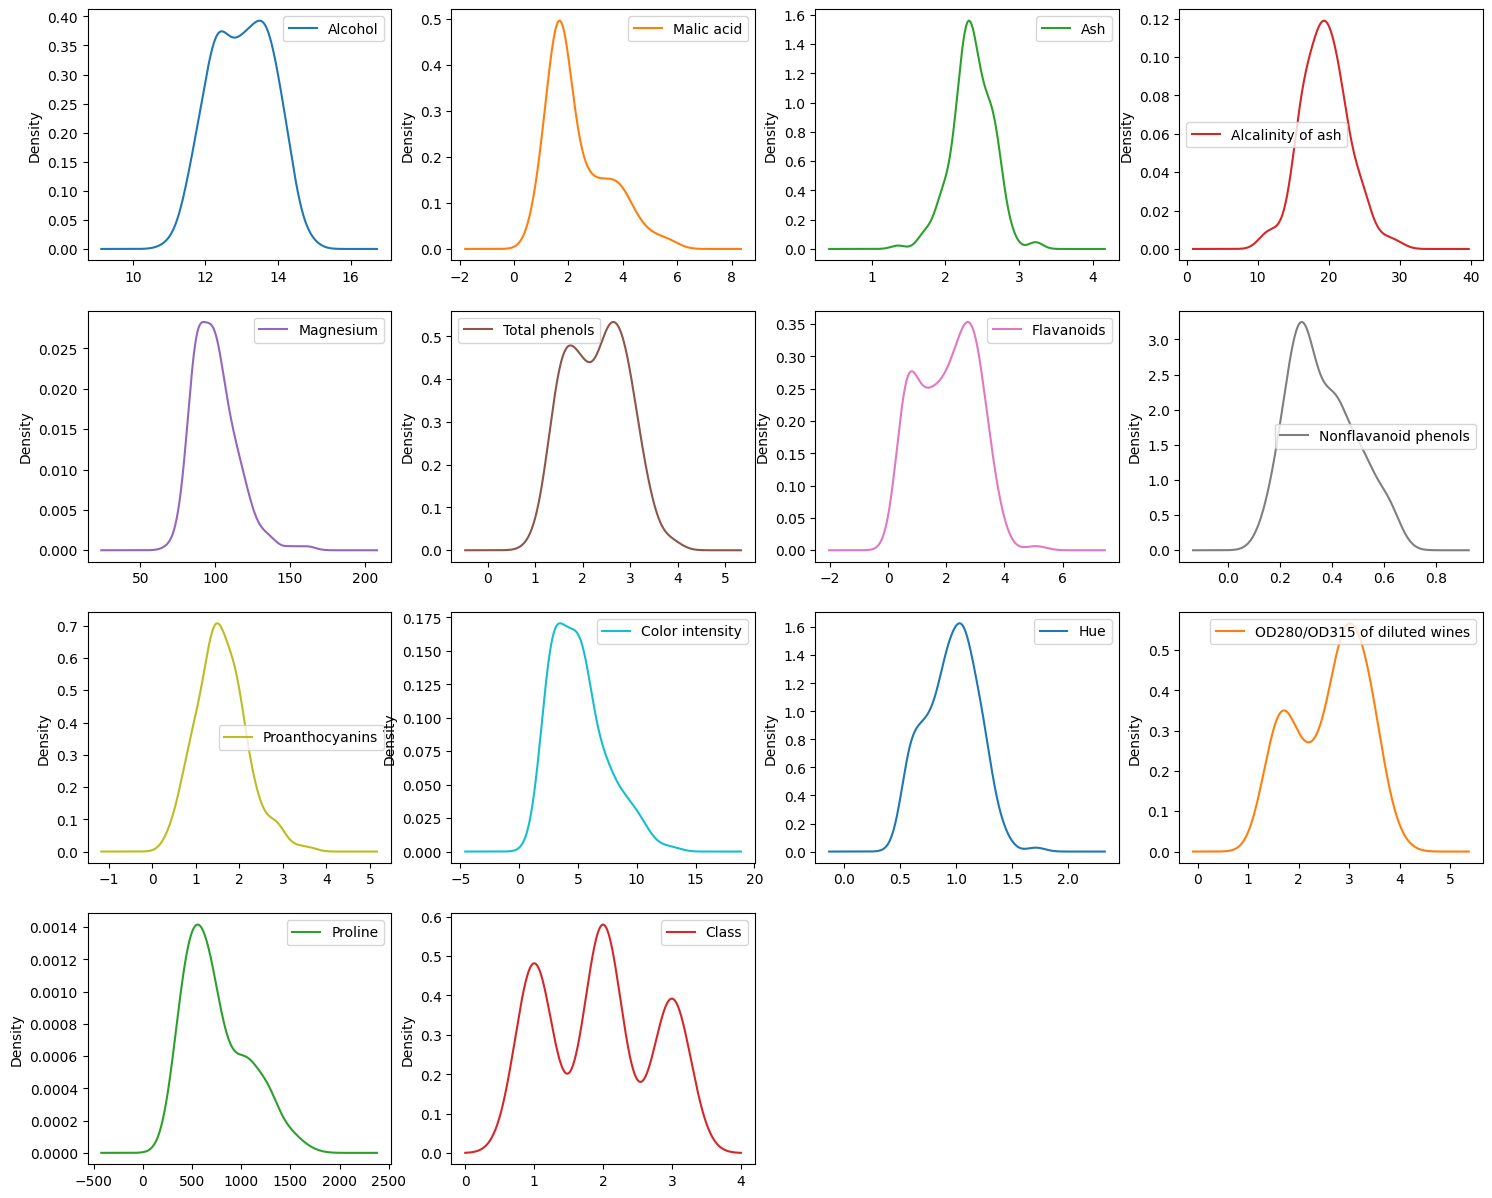

In [38]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(18, 15), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 25. <br/>Note that the data frame currently includes the labels as well.

In [39]:
# # splitting data into 80/20, I'm assuming I can't use sklearn

# # shuffles the dataframe for randomness of the split
# shuffled_df = df.sample(frac=1, random_state=25)

# # choose the index to split on 80% of the data
# split_index = int(0.8 * len(shuffled_df))

# # split the data into train and test samples
# train_df = shuffled_df[:split_index]
# test_df = shuffled_df[split_index:]

# # Separate features and the labels (Class)
# # X_train and test are of dimensions |samples| * 13
# # y_train and test are of dimensions |samples|
# X_train = train_df.drop('Class', axis=1).values
# y_train = train_df['Class'].values

# X_test = test_df.drop('Class', axis=1).values
# y_test = test_df['Class'].values

X = df.drop('Class', axis=1)         # Feature matrix
y = df['Class']                      # Output vector     

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

Implement the functions below. <br/>Both get test point x and return the predicted class, but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [40]:
# compute the likelihood of the sample x being distributed with a normal distribution,
# mean vector 'mean', and covariance matrix 'covariance'
def estimateLikelihood(x, mean, covariance):
    d = len(mean)                           # amount of features (14)
    
    #compute the multivariate gaussian pdf
    detCov = np.linalg.det(covariance)      # determinant of covariance matrix
    invCov = np.linalg.inv(covariance)      # inverse matrix of covariance matrix
    constant = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(detCov))

    exponent = -0.5 * np.dot(np.dot((x - mean).T, invCov), (x - mean))
    return constant * np.exp(exponent)

# Get a test sample x and return it's predicted Class
def classify_point_gaussian_bayes(x):
    # I'm copying the data so the original data will not change for any reason
    scores = []
    samplesTrain = X_train
    classesTrain = y_train

    classes = np.unique(y_train)        # number of classes

    for c in classes:
        X_c = X_train[y_train == c]         # array of samples that are from class c

        mean_c = np.mean(X_c, axis=0)       # mean vector of the current class (mean of each feature)
        cov_c = np.cov(X_c, rowvar=False)   # compute covariance matrix for current class (cov matrix of all features for X_c)
        prior_c = len(X_c) / len(X_train)   # compute prior for the current class (amount of appearances of class out of the entire data)

        likelihood = estimateLikelihood(x, mean_c, cov_c)
        score = likelihood * prior_c
        scores.append(score)
    
    predicted_class = classes[np.argmax(scores)]
    return predicted_class    
        
def classify_point_gaussian_naive_bayes(x):

    # I'm copying the data so the original data will not change for any reason
    samplesTrain = X_train
    classesTrain = y_train
    
    scores = []
    classes = np.unique(y_train)        # number of classes

    for c in classes:
        X_c = X_train[y_train == c]         # array of samples that are from class c

        mean_c = np.mean(X_c, axis=0)       # mean vector of the current class (mean of each feature)
        cov_c = np.cov(X_c, rowvar=False)   # compute covariance matrix for current class (cov matrix of all features for X_c)
        prior_c = len(X_c) / len(X_train)   # compute prior for the current class (amount of appearances of class out of the entire data)

        likelihood = estimateLikelihood(x, mean_c, np.diag(np.diag(cov_c)))    # finding pdf, for naive bayes I'm sending the diagonal matrix of cov_c, 
                                                                    # it should give us the wanted result
        score = likelihood * prior_c
        scores.append(score)
        
    
    predicted_class = classes[np.argmax(scores)]
    return predicted_class

Look at the test accuracies for both methods. Explain the differences origin. <br/>
Hint: Use correlation matrix visualization for data frames.  
<font color='aqua'>To conclude, Naive Bayes performed worse than Gaussian Bayes, this is because naive bayes assumes the data is not correlated. In reality the the compositions of minerals in wine are correlated to some extent.</font>

<br/> Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

In [41]:
res = []
for idx, test_point in enumerate(X_test):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(X_test):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 1.0
Test accuracy for gaussian naive bayes is 0.9444444444444444


Now, scale the data using StandardScaler.<br/>
Make sure that you are scaling the test according to the training (as learned in class)


In [42]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

Look at the test accuracies now. What can you conclude about the effect  of scaling? Is it good/bad? <br/>
<font color='aqua'>It looks like the scaled data gave a bad result compared to the unscaled data, perhaps it is not always a good idea to scale the data, especially when it is correlated.</font>

In [43]:
res = []
for idx, test_point in enumerate(X_test_scaled):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(X_test_scaled):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 0.3055555555555556
Test accuracy for gaussian naive bayes is 0.3888888888888889


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the tutorials.

(10272, 13)


0it [00:00, ?it/s]

10272it [00:03, 3262.37it/s]


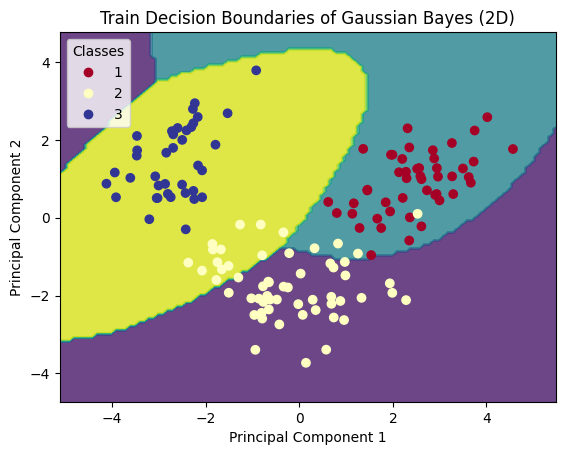

In [44]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

(6319, 13)


6319it [00:02, 3147.57it/s]


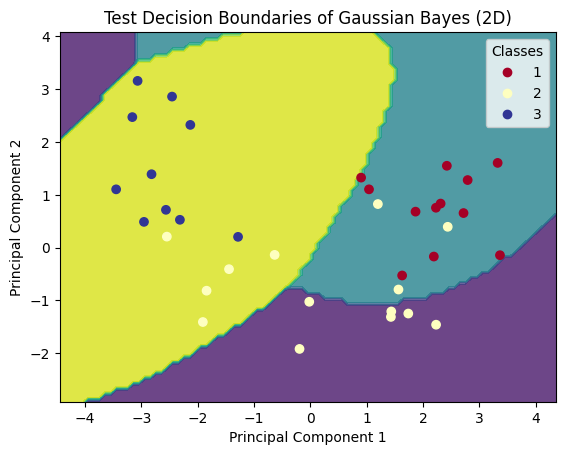

In [45]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(X_test_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

## Question 3 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict if a tweet is about cyberbullying or not. <br/>
We will have to classify sentences into 5 categories, <b>but could be any number.</b><br/>
The categories are {"not bullying", "gender", "age", "religion", "ethnicity"}.


import libarires

In [46]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [ ]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)
  # Implement here
  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
def learn_NB_text():
  # Implement here
	return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [ ]:
def ClassifyNB_text(Pw, P):
	# Implement here

Read the files

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [ ]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

## Question 4 - KNN

You want to detect types into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [3]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv')
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [5]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, or the Mahalanobis distance? <br/>
<font color='aqua'>Since Mahalanobis distance takes into account the correlation between feature it is probably better for this dataset</font>

In [6]:
corr_mat = df.corr()
print(corr_mat)

                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.535934   
L                  0.393404  1.000000  0.526516 -0.692619  0.199249   
R                  0.064216  0.526516  1.000000 -0.608728 -0.062509   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.352271   
Color              0.535934  0.199249 -0.062509 -0.352271  1.000000   
Spectral_Class     0.527404  0.409473  0.001467 -0.433673  0.701516   
Type               0.411129  0.676845  0.660975 -0.955276  0.409732   

                Spectral_Class      Type  
Temperature           0.527404  0.411129  
L                     0.409473  0.676845  
R                     0.001467  0.660975  
A_M                  -0.433673 -0.955276  
Color                 0.701516  0.409732  
Spectral_Class        1.000000  0.477165  
Type                  0.477165  1.000000  


Split the data to 80% train and 20% test, with random state 21. <br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [7]:
X = df.drop('Type', axis=1)         # Feature matrix
y = df['Type']                      # Output vector     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Implement the functions 'Euclidian', 'Manhattan'. <br/>
Those functions get train and test datasets and return distance metric, sized mxn (where m is the number of samples in test and n is the number of samples in train).<br/>
Reminder: Manhattan distance is $d(x,y)=\sum_{i=1}^d |x_i-y_i|$, d is the features number.


In [23]:
# This function gets a test set and a training set (both are dataframes with the same features)
# it returns a matrix of dimensions (sizeof_test x sizeof_train) which contains the distance
# between samples in TRAIN and TEST.
# In euclidean distance a distance between two samples is the following:
# SQUARE ROOT of the SUM of all square SUBTRACTION between corresponding
# X's (features), meaning we subtract color with color, spectral class with spectral class and
# so on, we sum them up then square root, and then assign the value to the right cell in the
# distances matrix.

def Euclidean(test, data):
    distances = np.zeros((test.shape[0], data.shape[0]))
    # in these loops we iterate through all samples in train and test.
    for rowTrain in range(data.shape[0]):
        for rowTest in range(test.shape[0]):
            # for each 2 samples, we define the final product
            product = 0
            # we sum up all the squared subtraction of corresponding features
            for inRow in range(data.shape[1]):
                product += (data.iloc[rowTrain].iloc[inRow] - test.iloc[rowTest].iloc[inRow]) ** 2
            # we apply square root to the entire sum and assign it to the correct cell in distances
            product = np.sqrt(product)
            distances[rowTest][rowTrain] = product
    return distances

def Manhattan(test, data):
    distances = np.zeros((test.shape[0], data.shape[0]))

    for rowTrain in range(data.shape[0]):
        for rowTest in range(test.shape[0]):
            # for each 2 samples, we define the final product
            product = 0
            # we sum up all the absolute distance between each pair of coressponding features
            for inRow in range(data.shape[1]):
                product += np.abs(data.iloc[rowTrain].iloc[inRow] - test.iloc[rowTest].iloc[inRow])
            # assign the final sumnation of all absolute distances of features
            distances[rowTest][rowTrain] = product
    return distances

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)
  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [15]:
def kNN_classify(data, labels, test, k, metric='Euclidean'):
    arguments = (test, data)
    distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric. basically evaluates "*metric*(test,data)"
    predictions = np.zeros([test.shape[0]])
    for rowTest in range(distances.shape[0]):
        
        # this array holds the indices of k neareast neighbors in the training data, 
        # both features and outputs
        kSmallestIndices = np.argpartition(distances[rowTest],k)[:k]
        
        # convert to original data indices, mainly for debugging, otherwise not necessary
        # for i in range(kSmallestIndices.shape[0]):
        #     kSmallestIndices[i] = labels.index[kSmallestIndices[i]]
        
        # counter class, each index of this class holds the amount it appears in the k smallest neighbors
        # we can do that since we enumerated the class from 0 to d (amount of features)
        countClasses = np.zeros((np.unique(labels).shape[0]))
        
        # iterate over the k smallest samples
        for i in range(kSmallestIndices.shape[0]):
            # for each neighbor we increment the cell that its index == its class
            countClasses[labels.iloc[kSmallestIndices[i]]] += 1
        
        # get the class that was closest to the current test sample the most
        predictions[rowTest] = countClasses.argmax()
    return predictions

Look at the plots for different k values and compare those metrics.

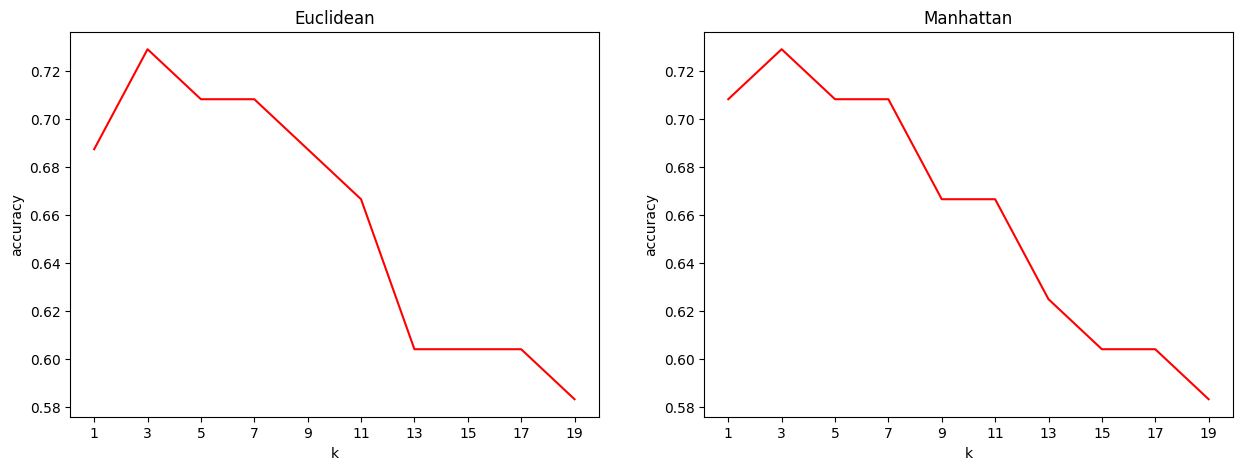

In [30]:
metrics = ['Euclidean', 'Manhattan']
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accs.append(1 - np.mean(np.array(c) != np.array([y_test.iloc[i] for i in range(y_test.shape[0])])))

  axs[idx].plot(ks, accs, color='red')
  axs[idx].set_xlabel('k')
  axs[idx].set_ylabel('accuracy')
  axs[idx].set_title(metric)
  axs[idx].set_xticks(ks)
plt.show()

The Mahalanobis distance metric is already implemented to you. <br/>Run the following code and answer: Which gives better accuracy?<br/>
<font color='aqua'>It seems that Mahalanobis distance gives a better result for the dataset</font>

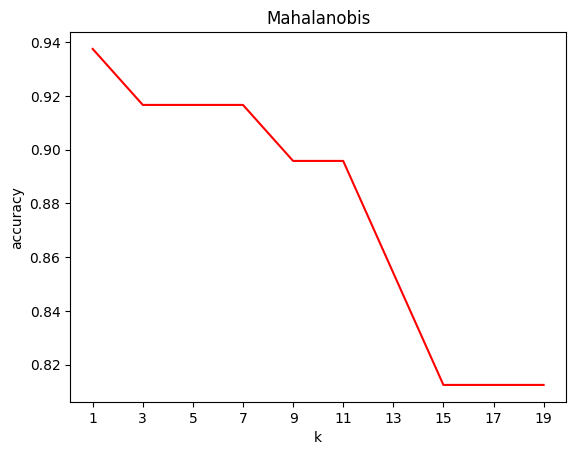

In [31]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  c = kNN_classify(X_train.to_numpy(), y_train, X_test.to_numpy(), k, 'Mahalanobis')
  accs.append(1- np.mean(np.array(c) != np.array([y_test.iloc[i] for i in range(y_test.shape[0])])))

plt.plot(ks, accs, color='red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Mahalanobis')
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We want to use advanced distance metric: <br/>
$$d_{\text{hybrid}}=d_{\text{mahalanobis}}+0.5*d_{\text{cosine}}$$
Implement the function 'Hybrid', which returns the distance metric, as defined above.


In [ ]:
def Cosine(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))

  # Calculate the Cosine distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = 1 - np.sum(test[i] * data[j]) / (np.linalg.norm(test[i]) * np.linalg.norm(data[j]))
  return distances

def Hybrid(test, data):
  # Implement here, 1-3 lines

Look at the plot. Does it perform better than the previous metrics?

In [ ]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  c = kNN_classify(X_train, y_train, X_test, k, 'Hybrid')
  accs.append()   # Implement here

axs[1, 1].plot(ks, accs, color='red')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('accuracy')
axs[1, 1].set_title('Hybrid')
axs[1, 1].set_xticks(ks)
plt.show()

You forgot to use scaling! Based on the feature densities (as done in Q3), determine which scaler should we use and perform it.

In [ ]:
# Peform scaling

Look at the plots. Did it help the accuracies? Try to justify the change in the hybrid metric.  
<font color='red'>Write here your answer and explain it</font>

In [ ]:
metrics = ['Euclidean', 'Manhattan', 'Mahalanobis', 'Hybrid']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train_scaled, y_train, X_test_scaled, k, metric)
    accs.append()   # Implement here

  axs[idx // 2, idx % 2].plot(ks, accs, color='red')
  axs[idx // 2, idx % 2].set_xlabel('k')
  axs[idx // 2, idx % 2].set_ylabel('accuracy')
  axs[idx // 2, idx % 2].set_title(metric)
  axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()